# How to include biological information into hyperdimensional vectors and is this useful?

In [1]:
include("../src/HDC.jl")
include("../src/math.jl")
include("../src/experimental.jl")
using DataFrames
using CSV

## Method 1: Via embeddings (ESM-2)

### 1K-D

In [2]:
#Load embeddings from last hidden layer of ESM-2 model (21x1280)
aa_embeddings = DataFrame(CSV.File("../data/amino_acid_embeddings.csv"))
amino_acids_esm = aa_embeddings.protein_ID
aa_emb = Matrix(aa_embeddings[:, 2:end])
# Create HDVs
HDV_mat_bit = nested_arrays2mat([bithdv() for i in 1:size(aa_emb)[2]], true)
HDV_mat_bip = nested_arrays2mat([hdv() for i in 1:size(aa_emb)[2]], true)

# Extend embeddings into hyperdimensional space
AA_bip_esm = permutedims(aa_emb * HDV_mat_bip .|> sign)
AA_bit_esm = permutedims(mat_scaler(aa_emb * HDV_mat_bit, 0, 1, 2) .|> round)

10000×21 Matrix{Float64}:
 1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  …  1.0  1.0  1.0  1.0  1.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0     1.0  0.0  1.0  0.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0     0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0     0.0  1.0  0.0  0.0  0.0  1.0  1.0
 0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  1.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  1.0  0.0
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0     0.0  0.0  1.0  1.0  0.0  1.0  0.0
 1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 

### 10K-D

In [3]:
# Create HDVs
HDV_mat_bit_10k = nested_arrays2mat([bithdv(10000) for i in 1:size(aa_emb)[2]], true)
HDV_mat_bip_10k = nested_arrays2mat([hdv(10000) for i in 1:size(aa_emb)[2]], true)

# Extend embeddings into hyperdimensional space
AA_bip_esm_10k = permutedims(aa_emb * HDV_mat_bip .|> sign)
AA_bit_esm_10k = permutedims(mat_scaler(aa_emb * HDV_mat_bit, 0, 1, 2) .|> round)

10000×21 Matrix{Float64}:
 1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  …  1.0  1.0  1.0  1.0  1.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0     1.0  0.0  1.0  0.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0     0.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0     0.0  1.0  0.0  0.0  0.0  1.0  1.0
 0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  1.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  1.0  0.0
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0     0.0  0.0  1.0  1.0  0.0  1.0  0.0
 1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 

## Method 2: A bit more true to HDC framework but naive without proper training

In [4]:
## Initiate random HDVs for every AA
AA_list = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'])

aa_bithdv = [bithdv() for i in 1:length(AA_list)]
aa_biphdv = [hdv() for i in 1:length(AA_list)]

aa_bithdv = Dict(zip(AA_list, aa_bithdv))
aa_biphdv = Dict(zip(AA_list, aa_biphdv))

# Make an HDV for every class
polar_hdv_bip = add([aa_biphdv[i] for i in groups["polar"]]...)
polar_hdv_bit = bitadd([aa_bithdv[i] for i in groups["polar"]]...)

nonpolar_hdv_bip = add([aa_biphdv[i] for i in groups["non-polar"]]...)
nonpolar_hdv_bit = bitadd([aa_bithdv[i] for i in groups["non-polar"]]...)

pos_hdv_bip = add([aa_biphdv[i] for i in groups["pos+"]]...)
pos_hdv_bit = bitadd([aa_bithdv[i] for i in groups["pos+"]]...)

neg_hdv_bip = add([aa_biphdv[i] for i in groups["neg-"]]...)
neg_hdv_bit = bitadd([aa_bithdv[i] for i in groups["neg-"]]...)

group_hdv_bip = Dict("polar"=>polar_hdv_bip, "non-polar" => nonpolar_hdv_bip, "pos+" => pos_hdv_bip, "neg-" => neg_hdv_bip)
group_hdv_bit = Dict("polar"=>polar_hdv_bit, "non-polar" => nonpolar_hdv_bit, "pos+" => pos_hdv_bit, "neg-" => neg_hdv_bit)

# Add random AA HDV to its class HDV to introduce similarity
for i in keys(groups)
    for j in groups[i]
        aa_biphdv[j] = add(aa_biphdv[j], group_hdv_bip[i])
    end
end

for i in keys(groups)
    for j in groups[i]
        aa_bithdv[j] = bitadd(aa_bithdv[j], group_hdv_bit[i])
    end
end

naive_bit = nested_arrays2mat([aa_bithdv[i] for i in AA_list])
naive_bip = nested_arrays2mat([aa_biphdv[i] for i in AA_list])

10000×20 Matrix{Float64}:
  0.0   1.0   1.0   1.0   0.0   1.0  …  -1.0   1.0   0.0   1.0   1.0   1.0
  0.0   0.0   1.0  -1.0  -1.0   0.0      1.0   0.0  -1.0  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0   1.0   0.0   0.0     -1.0   1.0   1.0  -1.0  -1.0   1.0
 -1.0  -1.0  -1.0  -1.0   1.0   1.0     -1.0  -1.0   0.0   1.0   1.0  -1.0
  1.0   1.0   1.0  -1.0  -1.0   1.0      1.0   1.0   0.0  -1.0   1.0   0.0
  0.0   0.0  -1.0   1.0  -1.0  -1.0  …   1.0   1.0   0.0  -1.0  -1.0   1.0
 -1.0   1.0   1.0   1.0  -1.0  -1.0      1.0   1.0   1.0   1.0   1.0   1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0   0.0  -1.0   1.0   1.0   0.0
 -1.0  -1.0  -1.0   1.0  -1.0  -1.0      1.0  -1.0   0.0   1.0   1.0  -1.0
  0.0  -1.0   1.0  -1.0   0.0  -1.0      1.0  -1.0   0.0  -1.0  -1.0  -1.0
  ⋮                             ⋮    ⋱         ⋮                      
 -1.0  -1.0   1.0  -1.0  -1.0   0.0      0.0   0.0   1.0  -1.0  -1.0   1.0
 -1.0   1.0  -1.0   1.0   1.0  -1.0      0.0  -1.0  -1.0   1.0  -1.0  -1.0
 -1

### 10K-D

In [5]:
aa_bithdv_10k = [bithdv(1000) for i in 1:length(AA_list)]
aa_biphdv_10k = [hdv(10000) for i in 1:length(AA_list)]
 
aa_bithdv_10k = Dict(zip(AA_list, aa_bithdv))
aa_biphdv_10k = Dict(zip(AA_list, aa_biphdv))

# Make an HDV for every class
polar_hdv_bip_10k = add([aa_biphdv_10k[i] for i in groups["polar"]]...)
polar_hdv_bit_10k = bitadd([aa_bithdv_10k[i] for i in groups["polar"]]...)

nonpolar_hdv_bip_10k = add([aa_biphdv_10k[i] for i in groups["non-polar"]]...)
nonpolar_hdv_bit_10k = bitadd([aa_bithdv_10k[i] for i in groups["non-polar"]]...)

pos_hdv_bip_10k = add([aa_biphdv_10k[i] for i in groups["pos+"]]...)
pos_hdv_bit_10k = bitadd([aa_bithdv_10k[i] for i in groups["pos+"]]...)

neg_hdv_bip_10k = add([aa_biphdv_10k[i] for i in groups["neg-"]]...)
neg_hdv_bit_10k = bitadd([aa_bithdv_10k[i] for i in groups["neg-"]]...)

group_hdv_bip_10k = Dict("polar"=>polar_hdv_bip_10k, "non-polar" => nonpolar_hdv_bip_10k, "pos+" => pos_hdv_bip_10k, "neg-" => neg_hdv_bip_10k)
group_hdv_bit_10k = Dict("polar"=>polar_hdv_bit_10k, "non-polar" => nonpolar_hdv_bit_10k, "pos+" => pos_hdv_bit_10k, "neg-" => neg_hdv_bit_10k)

# Add random AA HDV to its class HDV to introduce similarity
for i in keys(groups)
    for j in groups[i]
        aa_biphdv_10k[j] = add(aa_biphdv_10k[j], group_hdv_bip_10k[i])
    end
end

for i in keys(groups)
    for j in groups[i]
        aa_bithdv_10k[j] = bitadd(aa_bithdv_10k[j], group_hdv_bit_10k[i])
    end
end

naive_bit_10k = nested_arrays2mat([aa_bithdv_10k[i] for i in AA_list])
naive_bip_10k = nested_arrays2mat([aa_biphdv_10k[i] for i in AA_list])

MethodError: MethodError: no method matching +(::Pair{Char, Vector{Float64}}, ::Pair{Char, Vector{Float64}})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:591

## Method 3: Could we train a NN oursselves and extract embeddings from this?

## Method 4: Could we iteratively train AA embeddings via 'partial bundling'?

## Baseline random HDVs

In [12]:
rand_bit = nested_arrays2mat([bithdv() for i in 1:20])
rand_bip = nested_arrays2mat([hdv() for i in 1:20])

rand_bit_10k = nested_arrays2mat([bithdv(10000) for i in 1:20])
rand_bip_10k = nested_arrays2mat([hdv(10000) for i in 1:20])

10000×20 Matrix{Float64}:
  1.0   1.0   1.0   1.0  -1.0   1.0  …   1.0  -1.0   1.0  -1.0  -1.0   1.0
  1.0  -1.0   1.0  -1.0   1.0   1.0      1.0  -1.0   1.0   1.0  -1.0   1.0
 -1.0  -1.0   1.0   1.0   1.0  -1.0     -1.0   1.0  -1.0   1.0   1.0   1.0
 -1.0  -1.0   1.0  -1.0  -1.0  -1.0      1.0   1.0   1.0  -1.0  -1.0   1.0
 -1.0   1.0   1.0  -1.0  -1.0  -1.0     -1.0   1.0   1.0   1.0   1.0   1.0
 -1.0  -1.0   1.0   1.0   1.0   1.0  …   1.0   1.0   1.0   1.0   1.0   1.0
  1.0  -1.0  -1.0  -1.0  -1.0  -1.0      1.0  -1.0  -1.0  -1.0  -1.0   1.0
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0     -1.0  -1.0   1.0   1.0   1.0   1.0
 -1.0   1.0   1.0  -1.0  -1.0  -1.0      1.0   1.0  -1.0   1.0   1.0   1.0
  1.0   1.0  -1.0  -1.0  -1.0  -1.0      1.0  -1.0   1.0  -1.0  -1.0   1.0
  ⋮                             ⋮    ⋱         ⋮                      
  1.0  -1.0   1.0  -1.0  -1.0   1.0     -1.0   1.0   1.0  -1.0  -1.0   1.0
  1.0   1.0  -1.0   1.0   1.0  -1.0      1.0   1.0   1.0  -1.0   1.0  -1.0
 -1

## PCA plots: is the physicochemical and biological information encoded into the HDVs?
### Binary HDVs

In [7]:
using MultivariateStats

PCA_rand_bit = fit(PCA, rand_bit; maxoutdim=2)
proj_rand_bit = projection(PCA_rand_bit)

PCA_ESM_bit = fit(PCA, AA_bit_esm; maxoutdim=2)
proj_ESM_bit = projection(PCA_ESM_bit)

PCA_naive_bit = fit(PCA, naive_bit; maxoutdim=2)
proj_naive_bit = projection(PCA_naive_bit)

PCA_rand_bit_10k = fit(PCA, rand_bit_10k; maxoutdim=2)
proj_rand_bit_10k = projection(PCA_rand_bit_10k)

PCA_ESM_bit_10k = fit(PCA, AA_bit_esm_10k; maxoutdim=2)
proj_ESM_bit_10k = projection(PCA_ESM_bit_10k)

PCA_naive_bit_10k = fit(PCA, naive_bit_10k; maxoutdim=2)
proj_naive_bit_10k = projection(PCA_naive_bit_10k)

UndefVarError: UndefVarError: naive_bit_10k not defined

#### Random binary HDVs

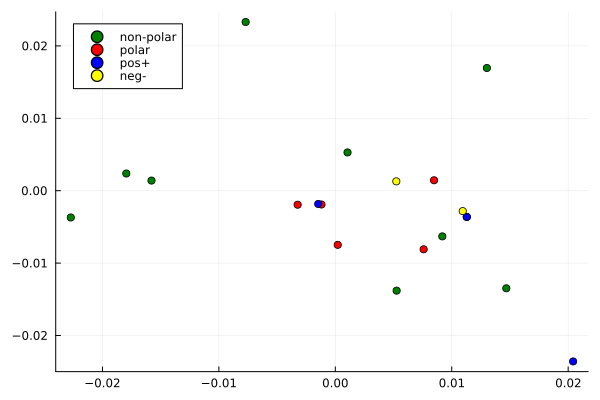

In [8]:
using Plots

key = collect(keys(groups))
indices = [[i for i in 1:length(AA_list) if AA_list[i] in groups[j]] for j in key]

colors = [:green, :red, :blue, :yellow]
fig = Plots.plot()

for i in 1:4
    scatter!(fig, (proj_rand_bit[indices[i], 1], proj_rand_bit[indices[i], 2]), label=key[i], mc = colors[i])
end

fig

#### ESM embedded HDVs

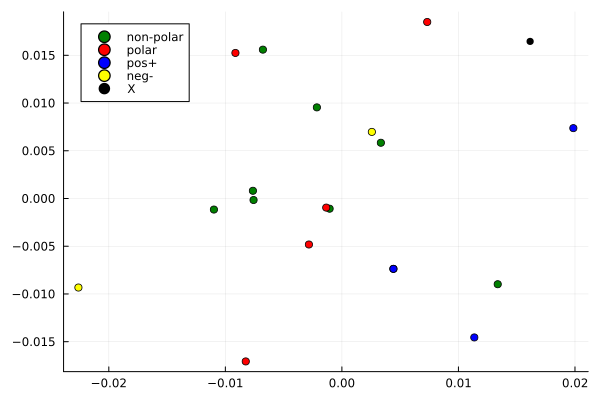

In [9]:
indices = [[i for i in 1:length(amino_acids_esm) if only(amino_acids_esm[i]) in groups[j]] for j in key]

colors = [:green, :red, :blue, :yellow]
fig = Plots.plot()

for i in 1:4
    scatter!(fig, (proj_ESM_bit[indices[i], 1], proj_ESM_bit[indices[i], 2]), label=key[i], mc = colors[i])
end
scatter!(fig, (proj_ESM_bit[21, 1], proj_ESM_bit[21, 2]), label="X", mc = :black)

fig

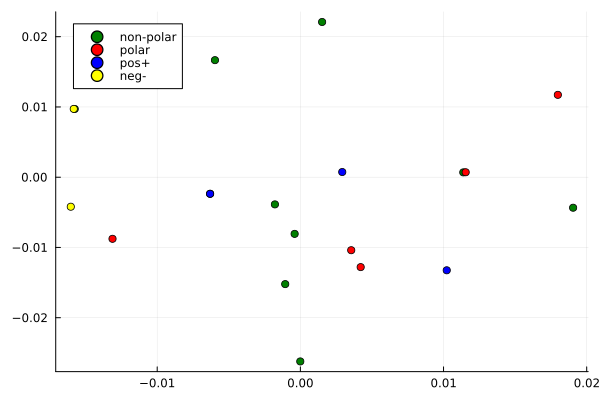

In [10]:
indices = [[i for i in 1:length(AA_list) if AA_list[i] in groups[j]] for j in key]

colors = [:green, :red, :blue, :yellow]
fig = Plots.plot()

for i in 1:4
    scatter!(fig, (proj_naive_bit[indices[i], 1], proj_naive_bit[indices[i], 2]), label=key[i], mc = colors[i])
end

fig

### ESM 10K

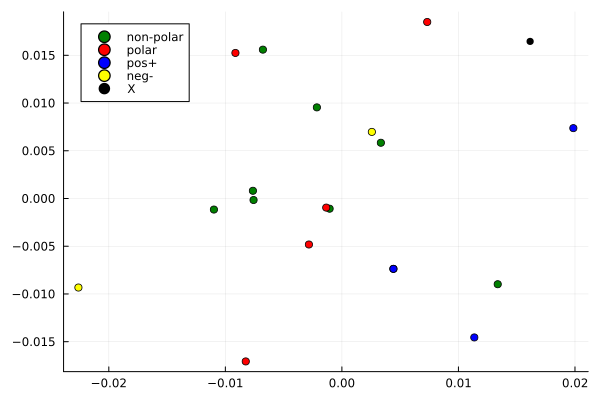

In [11]:
indices = [[i for i in 1:length(amino_acids_esm) if only(amino_acids_esm[i]) in groups[j]] for j in key]

colors = [:green, :red, :blue, :yellow]
fig = Plots.plot()

for i in 1:4
    scatter!(fig, (proj_ESM_bit_10k[indices[i], 1], proj_ESM_bit_10k[indices[i], 2]), label=key[i], mc = colors[i])
end
scatter!(fig, (proj_ESM_bit_10k[21, 1], proj_ESM_bit_10k[21, 2]), label="X", mc = :black)

fig